In [17]:
from bs4 import BeautifulSoup as bs
import requests, matplotlib.pyplot as plt, pandas as pd, unicodedata, numpy as np

webpage = requests.get("https://www.flipkart.com/search?q=iphone15&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off")
soup = bs(webpage.content, "html.parser")

def get_text_only(obj):
    return [item.get_text() for item in obj]

iphone_series = soup.find_all("div", class_="_4rR01T")
iphone_Discounted_price = soup.find_all("div", class_="_30jeq3 _1_WHN1")
iphone_Discount_rate = soup.find_all("div", class_="_3Ay6Sb")
iphone_Original_price = soup.find_all("div", class_="_3I9_wc _27UcVY")
iphone_Ratings_Reviews = soup.find_all("span", class_="_2_R_DZ")
iphone_Specifications = soup.find_all("ul", class_="_1xgFaf")

iphone_series = get_text_only(iphone_series)
iphone_Discounted_price = get_text_only(iphone_Discounted_price)
iphone_Discount_rate = get_text_only(iphone_Discount_rate)
iphone_Original_price = get_text_only(iphone_Original_price)
iphone_Ratings_Reviews = get_text_only(iphone_Ratings_Reviews)
iphone_Specifications = get_text_only(iphone_Specifications)

df = pd.DataFrame({
    "Title": iphone_series,
    "Current Price": iphone_Discounted_price,
    "Original Price": iphone_Original_price,
    "Ratings & Reviews": iphone_Ratings_Reviews,
    "Specifications": iphone_Specifications
})

cell_hover = {
    'selector': 'td:hover',
    'props': 'background-color: #ffffb3'
}
headers = {
    'selector': 'th',
    'props': 'background-color: #000066; color: white; text-align : center'
}
caption = {
    'selector': "caption",
    'props': [("font-color", "#000066"), ("font-size", "120%"), ("font-weight", "bold"), ("text-align", "left")]
}

styled_df = df.style.set_caption("I-phone 15 Series:- Flipkart Data Analysis") \
                     .background_gradient() \
                     .set_properties(**{'text-align': 'center'}) \
                     .set_table_styles([cell_hover, headers, caption]) \
                     .relabel_index([i for i in range(1, 25)], axis=0)


df.to_csv("I-Phone15 Flipkart Data Analysis.csv", index=False)


In [18]:
styled_df

,Title,Current Price,Original Price,Ratings & Reviews,Specifications
1,"Apple iPhone 15 (Blue, 128 GB)","₹66,999","₹79,900","18,110 Ratings & 1,239 Reviews","128 GB ROM15.49 cm (6.1 inch) Super Retina XDR Display48MP + 12MP | 12MP Front CameraA16 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories"
2,"Apple iPhone 15 (Black, 128 GB)","₹66,999","₹79,900","18,110 Ratings & 1,239 Reviews","128 GB ROM15.49 cm (6.1 inch) Super Retina XDR Display48MP + 12MP | 12MP Front CameraA16 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories"
3,"Apple iPhone 15 (Green, 128 GB)","₹66,999","₹79,900","18,110 Ratings & 1,239 Reviews","128 GB ROM15.49 cm (6.1 inch) Super Retina XDR Display48MP + 12MP | 12MP Front CameraA16 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories"
4,"Apple iPhone 15 (Pink, 128 GB)","₹66,999","₹79,900","18,110 Ratings & 1,239 Reviews","128 GB ROM15.49 cm (6.1 inch) Super Retina XDR Display48MP + 12MP | 12MP Front CameraA16 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories"
5,"Apple iPhone 15 Plus (Blue, 128 GB)","₹77,499","₹89,900","3,580 Ratings & 379 Reviews","128 GB ROM17.02 cm (6.7 inch) Super Retina XDR Display48MP + 12MP | 12MP Front CameraA16 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories"
6,"Apple iPhone 15 Plus (Pink, 128 GB)","₹77,499","₹89,900","3,580 Ratings & 379 Reviews","128 GB ROM17.02 cm (6.7 inch) Super Retina XDR Display48MP + 12MP | 12MP Front CameraA16 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories"
7,"Apple iPhone 15 Plus (Black, 128 GB)","₹77,499","₹89,900","3,580 Ratings & 379 Reviews","128 GB ROM17.02 cm (6.7 inch) Super Retina XDR Display48MP + 12MP | 12MP Front CameraA16 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories"
8,"Apple iPhone 15 Plus (Green, 128 GB)","₹77,499","₹89,900","3,580 Ratings & 379 Reviews","128 GB ROM17.02 cm (6.7 inch) Super Retina XDR Display48MP + 12MP | 12MP Front CameraA16 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories"
9,"Apple iPhone 15 Plus (Yellow, 128 GB)","₹77,499","₹89,900","3,580 Ratings & 379 Reviews","128 GB ROM17.02 cm (6.7 inch) Super Retina XDR Display48MP + 12MP | 12MP Front CameraA16 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories"
10,"Apple iPhone 15 (Pink, 256 GB)","₹82,999","₹89,900","18,110 Ratings & 1,239 Reviews","256 GB ROM15.49 cm (6.1 inch) Super Retina XDR Display48MP + 12MP | 12MP Front CameraA16 Bionic Chip, 6 Core Processor Processor1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories"


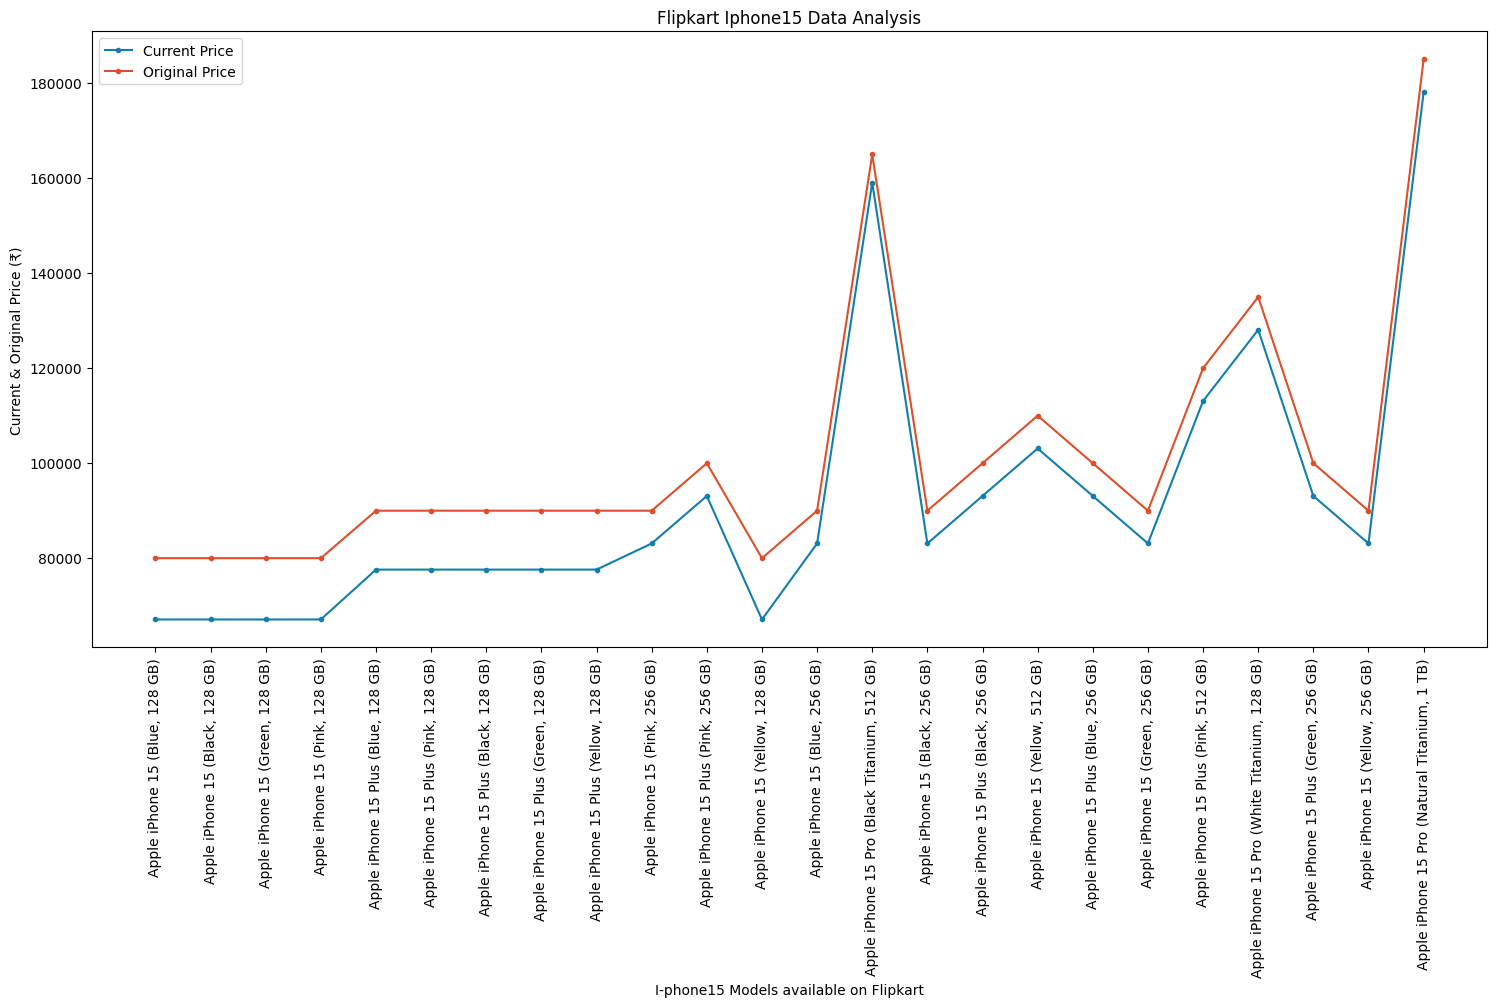

In [19]:
df1 = pd.DataFrame({ 
    "Title": iphone_series,
    "Current Price": df["Current Price"].str.replace('₹', '').str.replace(',', '').astype(float),
    "Original Price": df["Original Price"].str.replace('₹', '').str.replace(',', '').astype(float)
})

df1.plot(#kind="bar", 
         style = ".-",
         x = "Title",
         rot = 90,
         y = ["Current Price","Original Price"],
         stacked=False, 
         figsize=(18, 8), 
         color={"Current Price": "#127ead", "Original Price": "#dd4f2b"}
        )
plt.xlabel("I-phone15 Models available on Flipkart")
plt.xticks(np.arange(len(df["Title"])), df["Title"])
plt.ylabel("Current & Original Price (₹)")
plt.title("Flipkart Iphone15 Data Analysis")

plt.show()


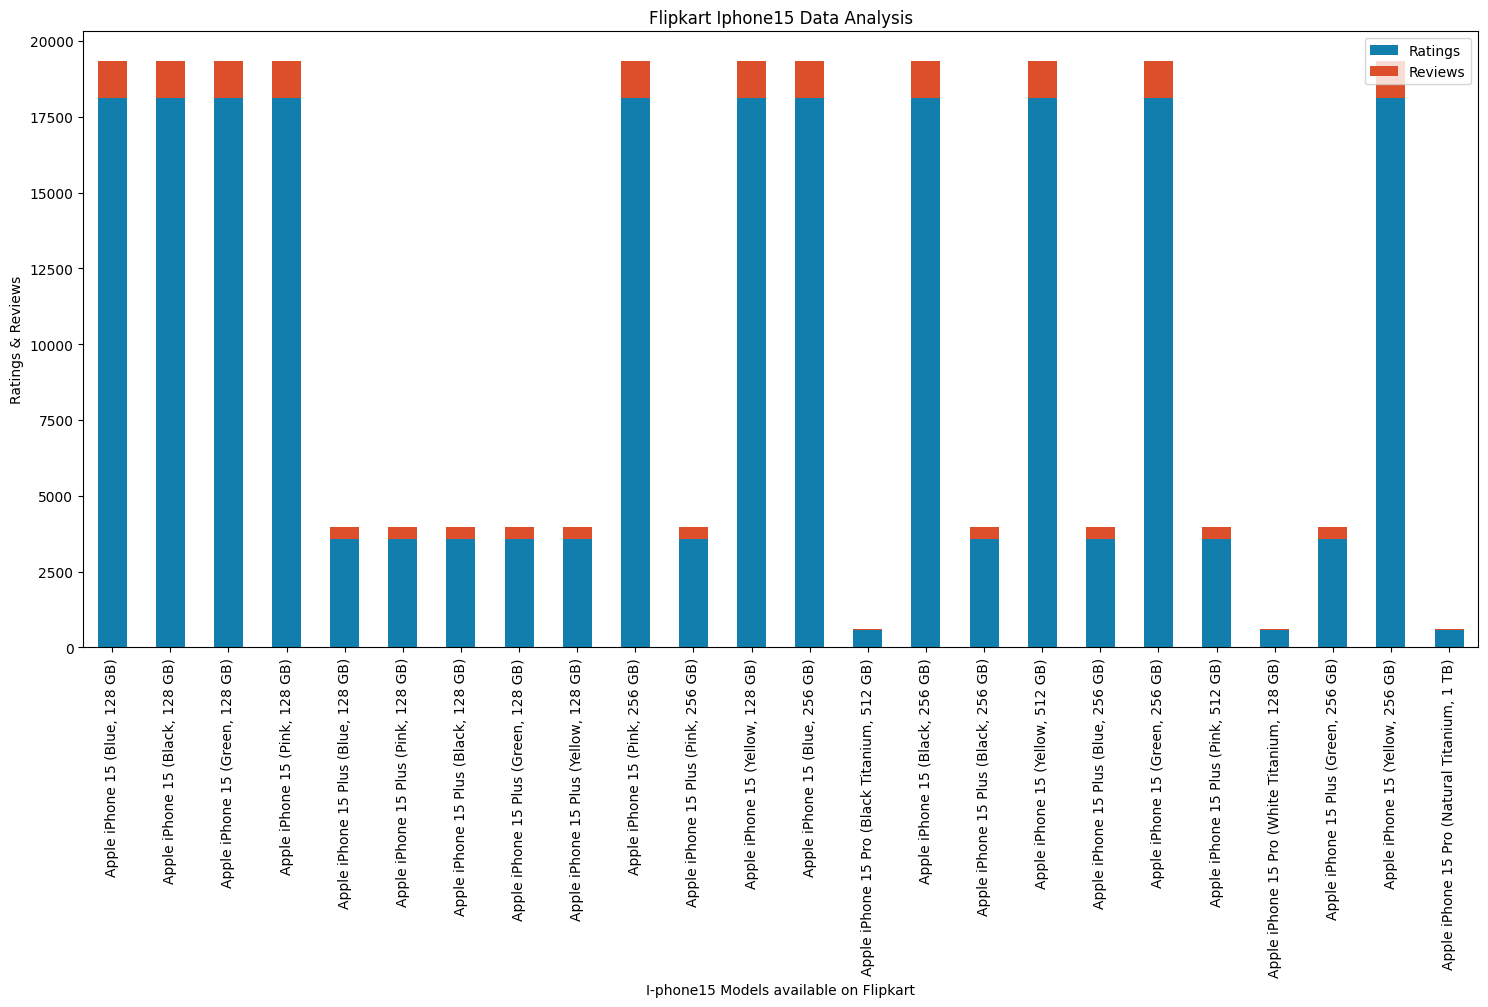

In [20]:
iphone_ratings = []
iphone_reviews = []

for i in df["Ratings & Reviews"]:
    rate = i.replace(",","").replace("Ratings","").replace("Reviews","").split("  & ")
    rate = unicodedata.normalize("NFKD", rate[0]).split("  & ")
    iphone_ratings.append(rate[0])
    iphone_reviews.append(rate[1])


df2 = pd.DataFrame({ 
    "Title": iphone_series,
    "Ratings": iphone_ratings,
    "Reviews": iphone_reviews
})


df2["Ratings"] = pd.to_numeric(df2["Ratings"])
df2["Reviews"] = pd.to_numeric(df2["Reviews"])


df2.plot(#style= "o--",
        kind = "bar",
        stacked = "False",
        x="Title",
        y=["Ratings","Reviews"],
        rot= 90,
        figsize=(18, 8), 
        color={"Ratings": "#127ead", "Reviews": "#dd4f2b"})

plt.xticks(np.arange(len(df["Title"])), df["Title"])
plt.xlabel("I-phone15 Models available on Flipkart")
plt.ylabel("Ratings & Reviews")
plt.title("Flipkart Iphone15 Data Analysis")
plt.show()

In [22]:
df

,Title,Current Price,Original Price,Ratings & Reviews,Specifications
0,"Apple iPhone 15 (Blue, 128 GB)","₹66,999","₹79,900","18,110 Ratings & 1,239 Reviews",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
1,"Apple iPhone 15 (Black, 128 GB)","₹66,999","₹79,900","18,110 Ratings & 1,239 Reviews",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
2,"Apple iPhone 15 (Green, 128 GB)","₹66,999","₹79,900","18,110 Ratings & 1,239 Reviews",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
3,"Apple iPhone 15 (Pink, 128 GB)","₹66,999","₹79,900","18,110 Ratings & 1,239 Reviews",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...
4,"Apple iPhone 15 Plus (Blue, 128 GB)","₹77,499","₹89,900","3,580 Ratings & 379 Reviews",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...
5,"Apple iPhone 15 Plus (Pink, 128 GB)","₹77,499","₹89,900","3,580 Ratings & 379 Reviews",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...
6,"Apple iPhone 15 Plus (Black, 128 GB)","₹77,499","₹89,900","3,580 Ratings & 379 Reviews",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...
7,"Apple iPhone 15 Plus (Green, 128 GB)","₹77,499","₹89,900","3,580 Ratings & 379 Reviews",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...
8,"Apple iPhone 15 Plus (Yellow, 128 GB)","₹77,499","₹89,900","3,580 Ratings & 379 Reviews",128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...
9,"Apple iPhone 15 (Pink, 256 GB)","₹82,999","₹89,900","18,110 Ratings & 1,239 Reviews",256 GB ROM15.49 cm (6.1 inch) Super Retina XDR...


In [23]:
df1

,Title,Current Price,Original Price
0,"Apple iPhone 15 (Blue, 128 GB)",66999.0,79900.0
1,"Apple iPhone 15 (Black, 128 GB)",66999.0,79900.0
2,"Apple iPhone 15 (Green, 128 GB)",66999.0,79900.0
3,"Apple iPhone 15 (Pink, 128 GB)",66999.0,79900.0
4,"Apple iPhone 15 Plus (Blue, 128 GB)",77499.0,89900.0
5,"Apple iPhone 15 Plus (Pink, 128 GB)",77499.0,89900.0
6,"Apple iPhone 15 Plus (Black, 128 GB)",77499.0,89900.0
7,"Apple iPhone 15 Plus (Green, 128 GB)",77499.0,89900.0
8,"Apple iPhone 15 Plus (Yellow, 128 GB)",77499.0,89900.0
9,"Apple iPhone 15 (Pink, 256 GB)",82999.0,89900.0


In [24]:
df2

,Title,Ratings,Reviews
0,"Apple iPhone 15 (Blue, 128 GB)",18110,1239
1,"Apple iPhone 15 (Black, 128 GB)",18110,1239
2,"Apple iPhone 15 (Green, 128 GB)",18110,1239
3,"Apple iPhone 15 (Pink, 128 GB)",18110,1239
4,"Apple iPhone 15 Plus (Blue, 128 GB)",3580,379
5,"Apple iPhone 15 Plus (Pink, 128 GB)",3580,379
6,"Apple iPhone 15 Plus (Black, 128 GB)",3580,379
7,"Apple iPhone 15 Plus (Green, 128 GB)",3580,379
8,"Apple iPhone 15 Plus (Yellow, 128 GB)",3580,379
9,"Apple iPhone 15 (Pink, 256 GB)",18110,1239
